# Assignment

# Problem Statement

Apply Linear Regression algorithems on Algerian forest fire Dataset, and build the best  model which 
predict a Temparature acuratley, try with all Linear regression algorithems(RIDGE,LASSO,ELASTIC NET)

Sice it was a clasification proble dataset

Take Temperature as a Dependent/output feature and remainig are independent/input  feature

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
# Let's create DataFrame

df= pd.read_csv('algerian_clean.csv')

In [26]:
df.keys()

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [28]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,notfire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,notfire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,notfire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,notfire,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,notfire,0.0


In [155]:
# lets drop 'Classes' feature since i am considering temperature as my output feature

dataset = df.drop('Classes', axis=1)

In [156]:
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0


# EDA

In [143]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Region       244 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 26.8 KB


In [144]:
dataset.describe().T   # some basic stats 

,count,mean,std,min,25%,50%,75%,max
day,244.0,15.754098,8.825059,1.0,8.000,16.00,23.000,31.0
month,244.0,7.500000,1.112961,6.0,7.000,7.50,8.000,9.0
year,244.0,2012.000000,0.000000,2012.0,2012.000,2012.00,2012.000,2012.0
Temperature,244.0,32.172131,3.633843,22.0,30.000,32.00,35.000,42.0
RH,244.0,61.938525,14.884200,21.0,52.000,63.00,73.250,90.0
Ws,244.0,15.504098,2.810178,6.0,14.000,15.00,17.000,29.0
Rain,244.0,0.760656,1.999406,0.0,0.000,0.00,0.500,16.8
FFMC,244.0,77.887705,14.337571,28.6,72.075,83.50,88.300,96.0
DMC,244.0,14.673361,12.368039,0.7,5.800,11.30,20.750,65.9
DC,244.0,49.288484,47.619393,6.9,13.275,33.10,68.150,220.4


In [145]:
dataset.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Region         0
dtype: int64

In [146]:
dataset.corr()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
day,1.000000e+00,2.232788e-17,NaN,0.095772,-0.074209,0.047001,-0.112265,0.224032,0.491571,0.527930,0.177727,0.517229,0.350890,4.662229e-16
month,2.232788e-17,1.000000e+00,NaN,-0.059017,-0.037884,-0.041447,0.035322,0.015577,0.068178,0.127669,0.061680,0.085822,0.084181,-9.586232e-17
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,9.577222e-02,-5.901677e-02,NaN,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370511,0.607551,0.455504,0.558495,2.734961e-01
RH,-7.420934e-02,-3.788419e-02,NaN,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220344,-0.690637,-0.348587,-0.570119,-4.064239e-01
Ws,4.700086e-02,-4.144673e-02,NaN,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076253,0.015248,0.029756,0.028850,-1.768290e-01
Rain,-1.122654e-01,3.532207e-02,NaN,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296808,-0.347105,-0.299171,-0.322715,-4.108006e-02
FFMC,2.240321e-01,1.557668e-02,NaN,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503919,0.739730,0.589652,0.686111,2.246798e-01
DMC,4.915710e-01,6.817778e-02,NaN,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875362,0.674499,0.982073,0.874816,1.910937e-01
DC,5.279300e-01,1.276691e-01,NaN,0.370511,-0.220344,0.076253,-0.296808,0.503919,0.875362,1.000000,0.498926,0.941906,0.740184,-8.148217e-02


In [147]:
dataset['year'].unique().sum()  # there is only one value in 'year' feature

2012

In [53]:
dataset.groupby('year').count()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
year,,,,,,,,,,,,,
2012,244,244,244,244,244,244,244,244,244,244,244,244,244


In [56]:
# let's drop a 'year' feature since it is not having any correlation and this will not be imp feature

In [148]:
dataset = df.drop('year', axis=1)

In [149]:
dataset.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,notfire,0.0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,notfire,0.0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,notfire,0.0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,notfire,0.0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,notfire,0.0


In [150]:
dataset.corr()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
day,1.000000e+00,2.232788e-17,0.095772,-0.074209,0.047001,-0.112265,0.224032,0.491571,0.527930,0.177727,0.517229,0.350890,4.662229e-16
month,2.232788e-17,1.000000e+00,-0.059017,-0.037884,-0.041447,0.035322,0.015577,0.068178,0.127669,0.061680,0.085822,0.084181,-9.586232e-17
Temperature,9.577222e-02,-5.901677e-02,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370511,0.607551,0.455504,0.558495,2.734961e-01
RH,-7.420934e-02,-3.788419e-02,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220344,-0.690637,-0.348587,-0.570119,-4.064239e-01
Ws,4.700086e-02,-4.144673e-02,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076253,0.015248,0.029756,0.028850,-1.768290e-01
Rain,-1.122654e-01,3.532207e-02,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296808,-0.347105,-0.299171,-0.322715,-4.108006e-02
FFMC,2.240321e-01,1.557668e-02,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503919,0.739730,0.589652,0.686111,2.246798e-01
DMC,4.915710e-01,6.817778e-02,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875362,0.674499,0.982073,0.874816,1.910937e-01
DC,5.279300e-01,1.276691e-01,0.370511,-0.220344,0.076253,-0.296808,0.503919,0.875362,1.000000,0.498926,0.941906,0.740184,-8.148217e-02
ISI,1.777266e-01,6.168011e-02,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,0.498926,1.000000,0.635891,0.907610,2.684206e-01


In [61]:
# sns.pairplot(dataset)

<AxesSubplot:>

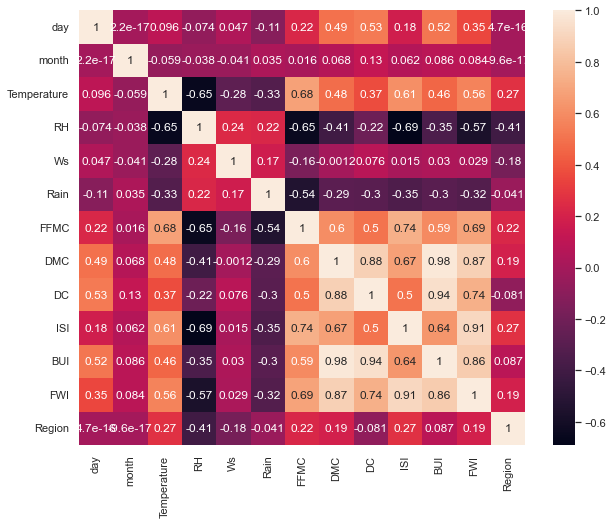

In [151]:
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(dataset.corr(), annot=True)

In [63]:
# lets plot some scatter plot to understand the relation between independet and o/p(Temperature)

Text(0, 0.5, 'Temperature')

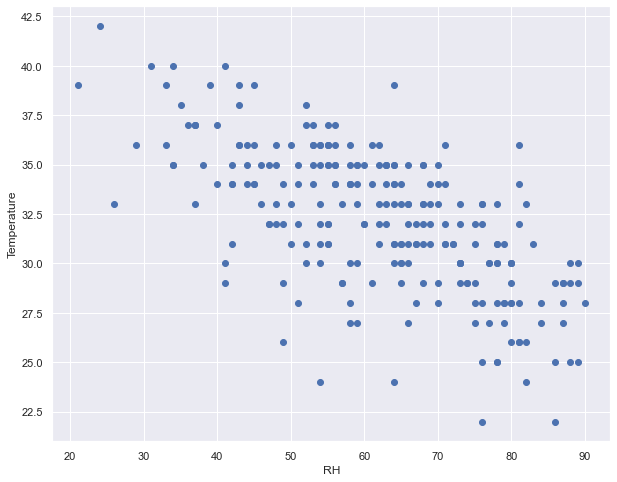

In [67]:
plt.scatter(dataset['RH'],dataset['Temperature'])
plt.xlabel("RH")
plt.ylabel("Temperature")

# here we can see that 'RH' and "Temperature" are negativly corelated

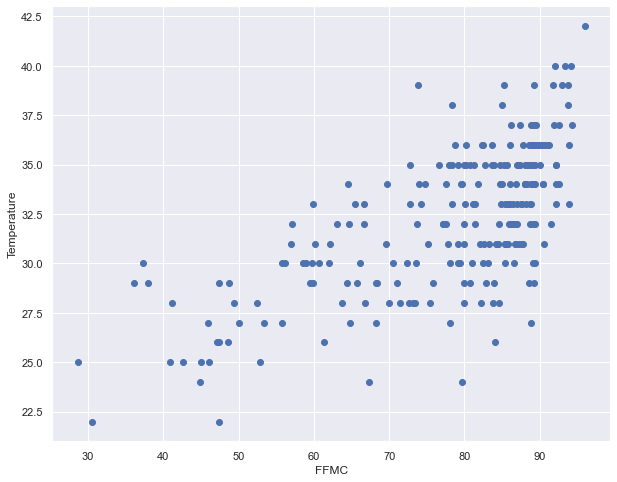

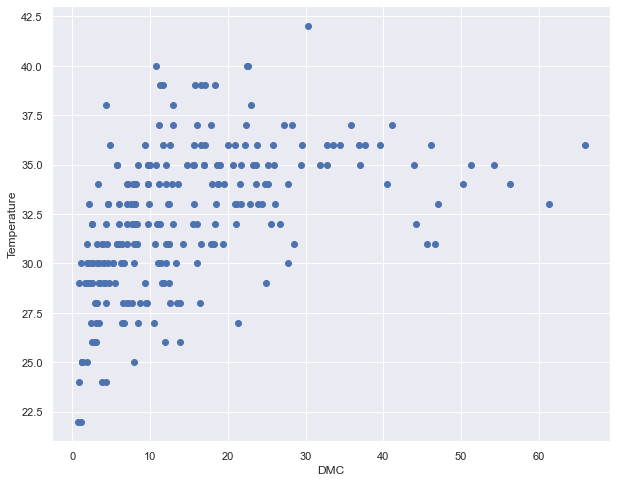

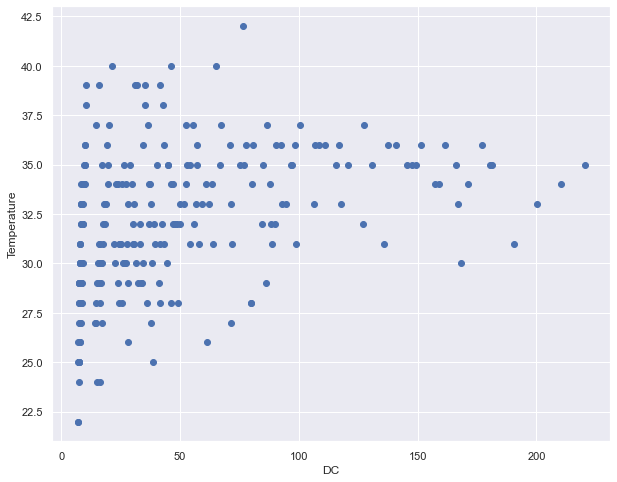

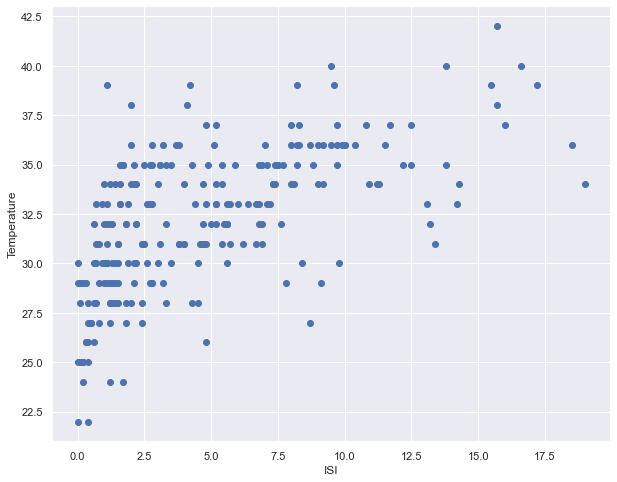

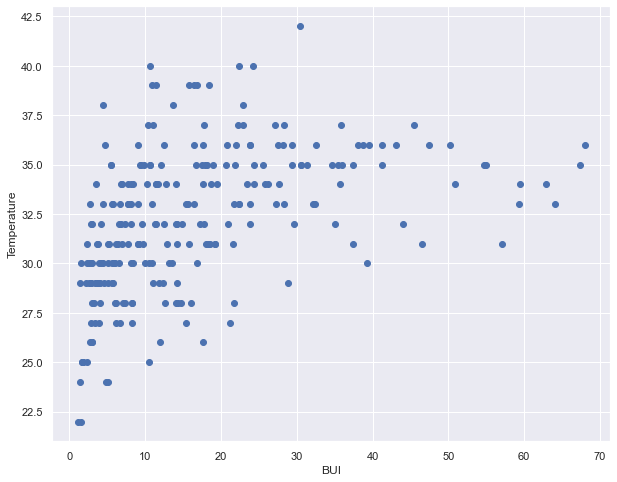

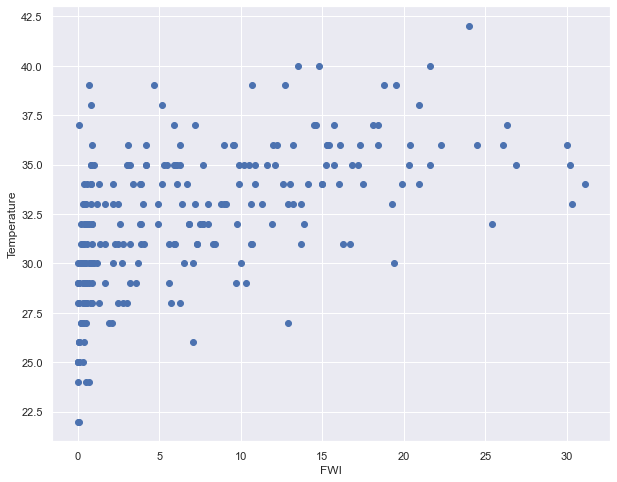

In [73]:
for feature in ['FFMC','DMC', 'DC','ISI','BUI','FWI']:
    plt.scatter(dataset[feature],dataset['Temperature'])
    plt.xlabel(feature)
    plt.ylabel("Temperature")
    plt.show()

# Obseravation:

you can see in above graph 'FFMC','DMC', 'DC','ISI','BUI','FWI' fatures are positivly corelated,
this features are important to predict the temperature

In [82]:
data_imp= dataset.iloc[:,6:]

In [ ]:
# let's plot regretion plot

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


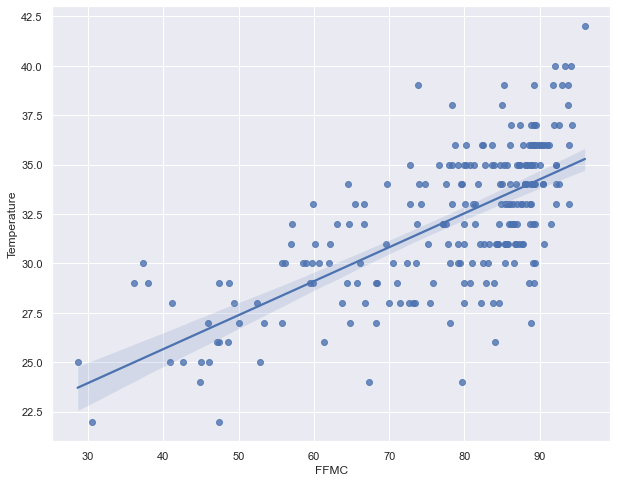

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


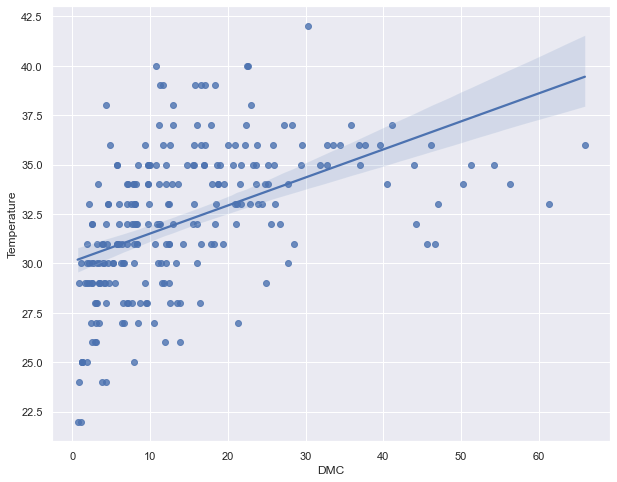

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


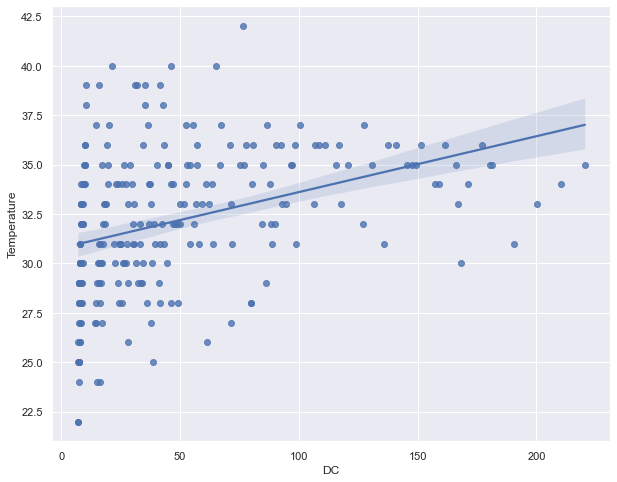

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


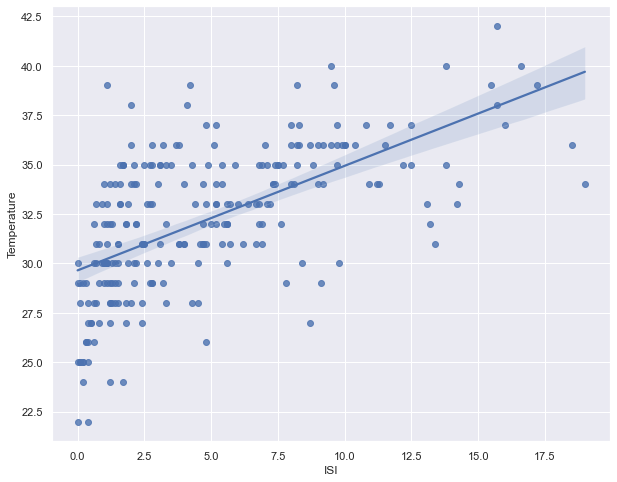

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


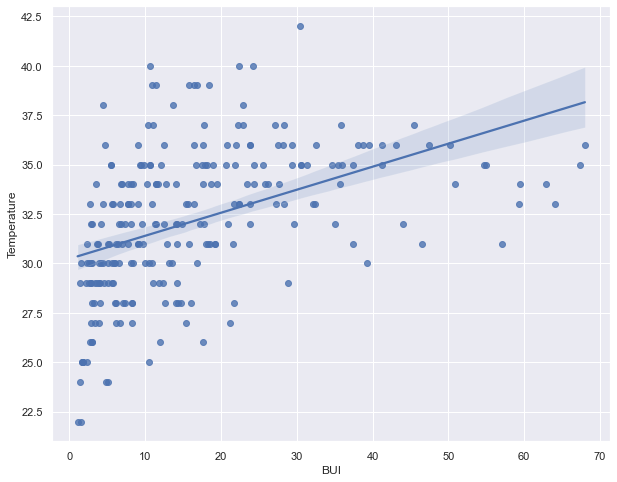

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


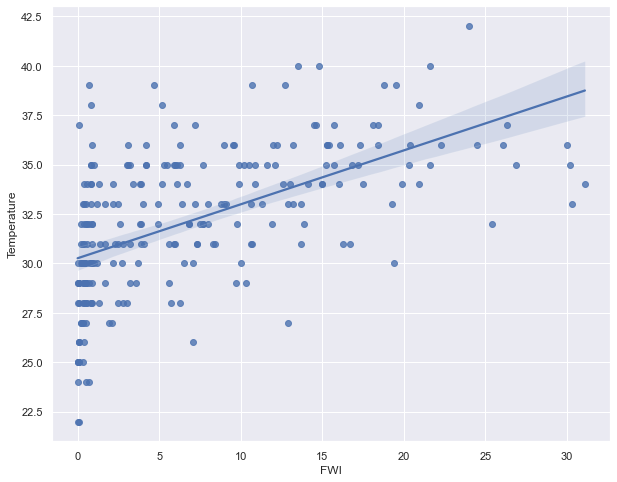

In [84]:
for feature in ['FFMC','DMC', 'DC','ISI','BUI','FWI']:
    sns.regplot(dataset[feature],dataset['Temperature'])
    plt.xlabel(feature)
    plt.ylabel("Temperature")
    plt.show()

In [85]:
# lets plot box plot try to identify outlies in each features

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


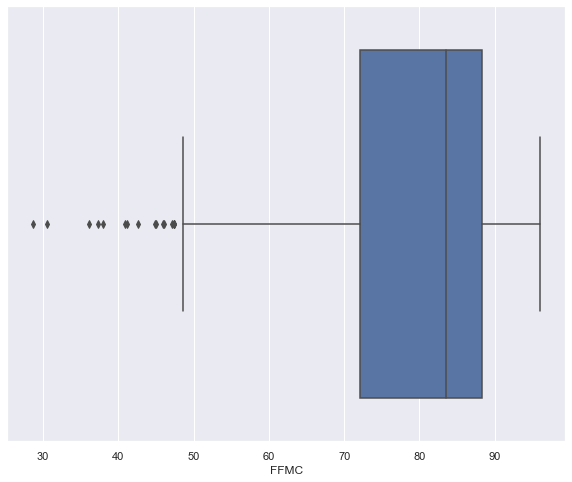

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


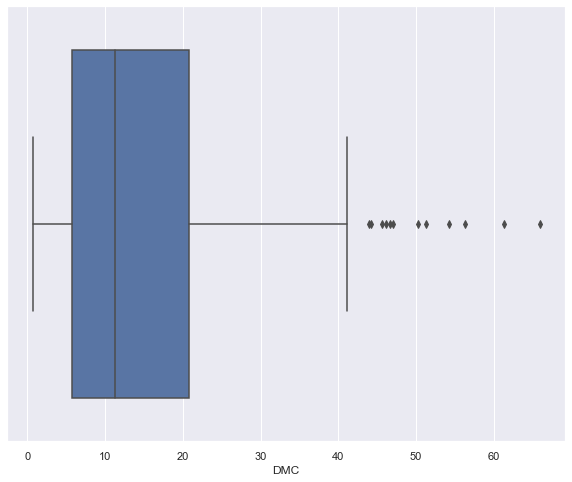

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


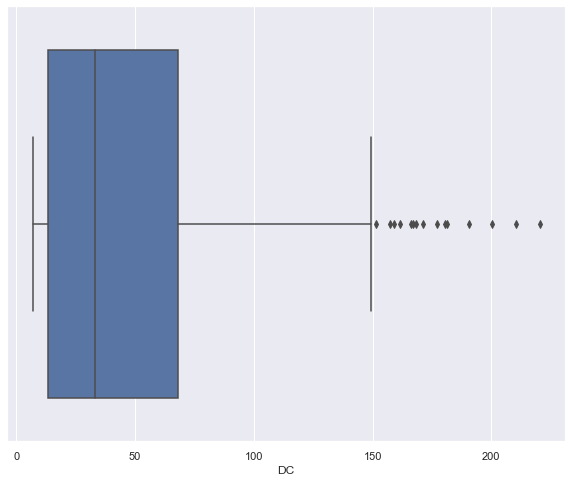

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


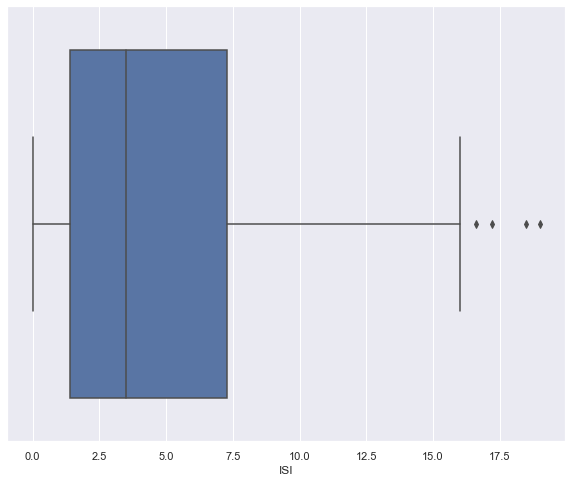

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


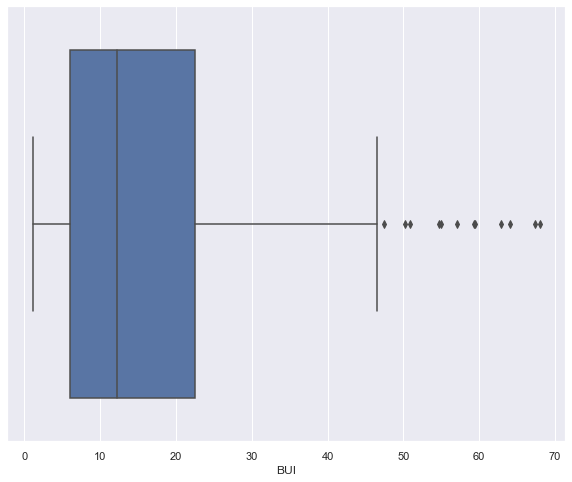

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


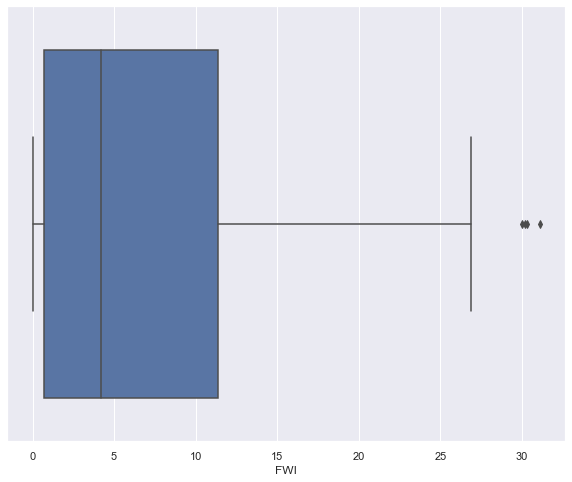

In [113]:
# plt.subplots(2,3,figsize=(50,20))

for feature in ['FFMC','DMC', 'DC','ISI','BUI','FWI']:
   
    sns.boxplot(dataset[feature])
    plt.xlabel(feature)
    plt.show()

# Observation

1, from above graph i can say that there is a outliers in all feature

2, in 'ISI' and 'FWi' feature has a less Outliers than others features

3, except 'FFMC' feature ramaining all feature has a  outliers on right side 

# Model Building

In [123]:
## Independent And Dependent Features

In [159]:
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0


In [160]:
X= dataset.drop('Temperature',axis=1) # independent feat

In [161]:
X.head()

,day,month,year,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,1,6,2012,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0
1,2,6,2012,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0
2,3,6,2012,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0
3,4,6,2012,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0.0
4,5,6,2012,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0


In [162]:
y=dataset['Temperature']  # dependent or output feat

In [163]:
y.head()

0    29
1    29
2    26
3    25
4    27
Name: Temperature, dtype: int64

# Splitting the data into
1, Trainig Dataset 2, Test Dataset

In [164]:
from sklearn.model_selection import train_test_split

In [165]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=10)

In [166]:
# X_train out put feat is y_train
# X_test out put feat is y_test

In [167]:
X_train.shape

(163, 13)

In [168]:
y_train.shape   # no of rows will be same for bith X and Y train

(163,)

In [169]:
X_test.shape

(81, 13)

In [170]:
y_test.shape

(81,)

# Feature Engineering

In [136]:
## Standardize or feature scaling the datasets( able to reach global minima Quickly)

In [172]:
## Standardaize or feature scaling the datasets

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

# StandardScaler :) it standardise the data, mean is Zero SD is one, (bringing all the value is same scale)

In [173]:
scaler

StandardScaler()

In [174]:
X_train=scaler.fit_transform(X_train)   # applying transformation on X_train by Z-score

In [175]:
X_test=scaler.transform(X_test)   # applying test X_test dataset


# same train mean and sd used but z-score calculated seperatly since i am trnsforming it,
# to avoide data leakege from train dataset , i did't use 'fit_transform'

In [176]:
X_train

array([[ 1.0627621 ,  1.33562856,  0.        , ..., -0.32535487,
        -0.8560376 ,  0.98176139],
       [ 0.34495731,  0.44338489,  0.        , ...,  0.76565444,
         1.21985155, -1.01857744],
       [ 1.30203036, -1.34110244,  0.        , ...,  0.35302912,
         0.49262924, -1.01857744],
       ...,
       [-0.01394508,  1.33562856,  0.        , ...,  0.08727045,
         0.38685145,  0.98176139],
       [-1.32992053, -1.34110244,  0.        , ..., -0.76595478,
        -0.77670425,  0.98176139],
       [-0.61211574, -1.34110244,  0.        , ..., -0.27639932,
        -0.78992648, -1.01857744]])

In [177]:
X_test

array([[-0.49248161, -0.44885878,  0.        , ..., -0.68203099,
        -0.8031487 ,  0.98176139],
       [ 1.90020102, -0.44885878,  0.        , ...,  1.72378441,
         1.16696265, -1.01857744],
       [-1.68882292,  0.44338489,  0.        , ..., -0.82889763,
        -0.78992648, -1.01857744],
       ...,
       [ 0.94312797, -1.34110244,  0.        , ..., -0.68902464,
        -0.8031487 ,  0.98176139],
       [ 1.30203036,  0.44338489,  0.        , ...,  3.31833647,
         3.09740734,  0.98176139],
       [-0.13357921,  1.33562856,  0.        , ..., -1.04570076,
        -0.89570427, -1.01857744]])

# Model Training

In [178]:
# this is multiple linear reg problem since we have more than one independent feature

In [179]:
from sklearn.linear_model import LinearRegression

In [182]:
regression= LinearRegression()

In [183]:
regression

LinearRegression()

In [184]:
regression.fit(X_train,y_train)  

# 'fit' menas training the data(just train), try to find out coefficient/ best fit line/parameter, here i am not changing data


#'fit_transform',means send the data and change the data, by applying  z-score

LinearRegression()

In [185]:
## print the coefficients and the intercept

print(regression.coef_)

# there are 13 coef since we have 13 Independent feat/column

[-1.51635979e-01 -3.08166852e-01 -9.99200722e-16 -1.14176172e+00
 -5.94836123e-01 -2.00886786e-01  1.03363500e+00 -1.06906981e-01
  1.08373567e+00  4.68396809e-01 -3.49994228e-01 -2.60680102e-01
  2.78576762e-01]


from above coef if teperature increse 'FFMC' and 'ISI' incresing since the coef if positive(1.003),(1.083)

In [189]:
print(regression.intercept_)  # if all independent feture is  Zero Temperature of the model is Zero

32.17791411042945


In [190]:
## Prediction for the test data

reg_pred=regression.predict(X_test)

In [191]:
reg_pred

array([31.95863949, 33.36550528, 33.1537026 , 31.49901745, 32.79430441,
       34.77305969, 33.84444373, 34.27407305, 31.9165592 , 33.11603175,
       33.6056502 , 27.05049782, 35.19020678, 29.42466523, 32.0622763 ,
       32.27210972, 34.73917202, 27.13152606, 36.21880486, 34.33826017,
       33.13547893, 34.5244805 , 33.72460534, 33.14659754, 36.11918272,
       29.48457061, 32.28694428, 31.92739176, 26.67416854, 32.39640977,
       25.15016313, 26.90421651, 34.32934149, 32.20634237, 33.12777435,
       30.60768137, 29.16587229, 32.38276706, 27.04324086, 35.4828862 ,
       32.68323079, 33.95478781, 34.36271754, 31.31861243, 36.49337877,
       33.92702379, 24.05732948, 35.22444564, 34.0450436 , 29.20642029,
       31.40446273, 32.41088213, 35.57311169, 32.49149148, 29.69974715,
       29.87583491, 32.72617008, 36.24832717, 31.38876348, 33.26872766,
       32.33292353, 32.88093839, 31.37440472, 24.98805242, 31.38076297,
       36.4780872 , 29.74381847, 29.92291232, 34.90701522, 33.92

# Assumption of linear Regression

1, if we plot a graph, Test Truth Data(dependent) vs Test Predicted Data(independent, there must exist  linear relation


Text(0, 0.5, 'Test Predicted Data')

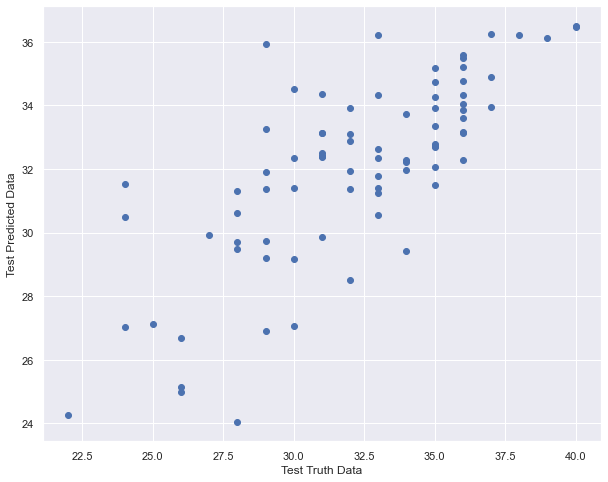

In [192]:
#1, if we plot a graph, Test Truth Data(dependent) vs Test Predicted Data(independent, there must exist  linear relation

plt.scatter(y_test,reg_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


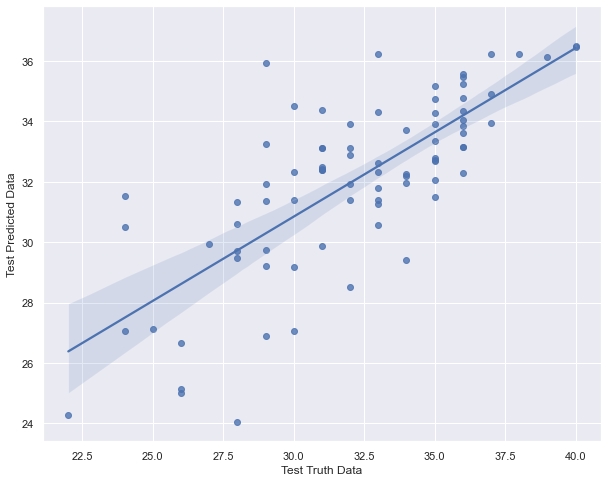

In [194]:
sns.regplot(y_test,reg_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")
plt.show()

In [195]:
# i can say from above graphs  that there is linear relation  according to assumotion

2,  residuals must be normally distrubuted 

In [196]:
residuals=y_test-reg_pred

In [197]:
residuals

162    2.041361
60     1.634495
61     2.846297
63     3.500983
69     2.205696
         ...   
169    0.384413
232   -6.929846
144    1.213095
208   -3.222648
105   -2.262291
Name: Temperature, Length: 81, dtype: float64

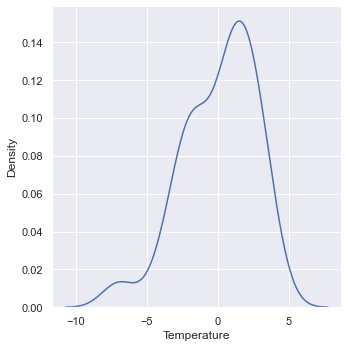

In [202]:
sns.displot(residuals,kind='kde')

# normally distibuted with left skewed

3, plot with predictions and residual is uniformly distributed (randomly distributed, should not have any shape and size at all)


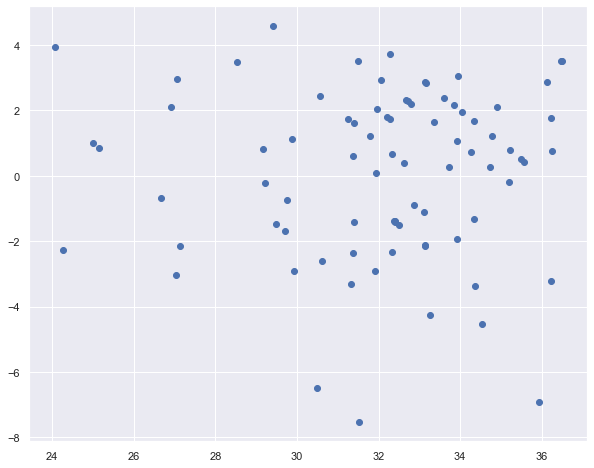

In [200]:
plt.scatter(reg_pred,residuals)

# i can see that there is uniform or randomlyedisrubution 

In [203]:
## ASSUMPTION:)

#1, if we plot a graph, Test Truth Data(dependent) vs Test Predicted Data(independent, there must exist  linear relation

#2,  residuals must be normally distrubuted 

#3, plot with predictions and residual is uniformly distributed (randomly distributed, should not have any shape and size at all)


# Performance Metrics

  Checking a model how it is performing(well or bad)

In [204]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

6.60731649859733
2.1272539328787805
2.5704700929202287


# R square and adjusted R square

In [205]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

0.5630772284535358


In [206]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.4783011683027294

i am getting an r2 0.563 which means the accuracy of model is 56.3% which is good

I can say that the model performing well and predicting acuuratley with linear regrssion algorithems

# Ridge Regression

In [209]:
from sklearn.linear_model import Ridge
ridge=Ridge()

In [210]:
ridge.fit(X_train,y_train)

Ridge()

In [214]:
## print the coefficients and the intercept
print(ridge.coef_)

[-0.14782888 -0.29970417  0.         -1.13919774 -0.59106517 -0.20743179
  1.02361342 -0.20333168  0.9574887   0.44165109 -0.14029856 -0.23348722
  0.27240289]


In [213]:
print(ridge.intercept_)

32.17791411042945


In [217]:
ridge_prd= ridge.predict(X_test)   # priction on X-test data

In [218]:
ridge_prd

array([31.95421153, 33.36438632, 33.15417664, 31.51051941, 32.79308944,
       34.77867076, 33.80392125, 34.18026292, 31.91555851, 33.10360048,
       33.6117355 , 27.08108606, 35.1791676 , 29.40992486, 32.05669387,
       32.27240847, 34.70616449, 27.1796676 , 36.22370326, 34.3682868 ,
       33.11589438, 34.45770585, 33.72133501, 33.14691226, 36.09712777,
       29.48996071, 32.23075375, 31.96393386, 26.72148343, 32.38730709,
       25.18304943, 26.93331665, 34.30392486, 32.20174888, 33.11201137,
       30.60460877, 29.15693227, 32.37662982, 27.08423431, 35.45634805,
       32.66953059, 33.96813506, 34.36415886, 31.30308498, 36.47879284,
       33.92630536, 24.06528345, 35.22216666, 34.05236051, 29.21969589,
       31.38999413, 32.40883795, 35.6015377 , 32.47334754, 29.7239219 ,
       29.86772787, 32.74802131, 36.26736507, 31.39699846, 33.25953573,
       32.3210376 , 32.87066615, 31.37083992, 24.96073639, 31.38752796,
       36.43629187, 29.75351554, 29.9027705 , 34.9308049 , 33.90

Text(0, 0.5, 'Test Predicted Data')

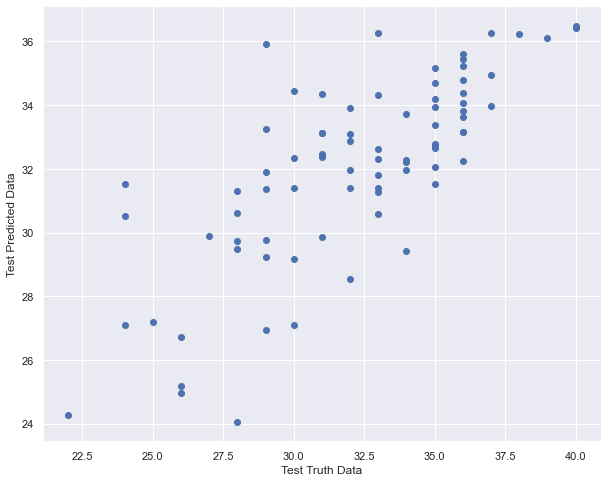

In [219]:
plt.scatter(y_test,ridge_prd)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [224]:
## residuals
resdl= y_test - ridge_prd

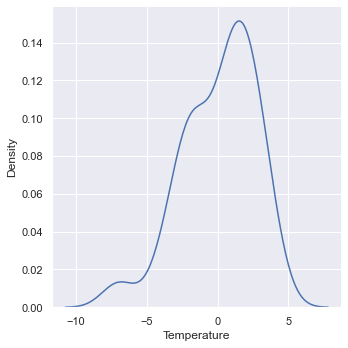

In [225]:
sns.displot(resdls,kind="kde")

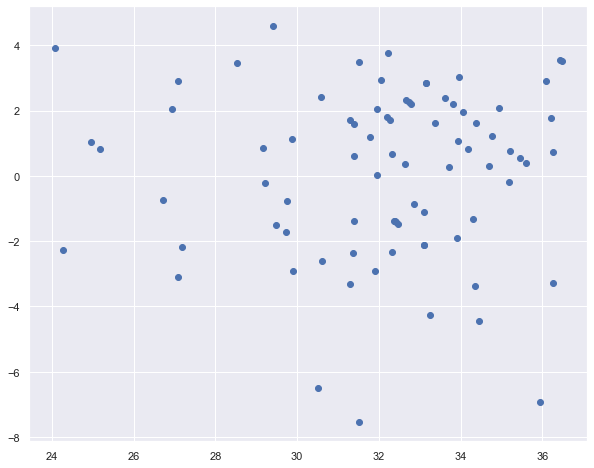

In [226]:
## SCatter plot with predictions and residual
##uniform distribution
plt.scatter(ridge_prd,resdls)

In [227]:
## Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,resdls))
print(mean_absolute_error(y_test,resdls))
print(np.sqrt(mean_squared_error(y_test,resdls)))

1035.7295198185914
32.05337870760483
32.182751899403996


In [228]:
from sklearn.metrics import r2_score
score=r2_score(y_test,resdls)
print(score)

-67.489804063071


In [229]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

-80.77887052306986

R2 value by Ridge regression algorithem is negative since there is no overfitting and this algorithem performs well for the overfitting data, 

# Lasso regression

In [230]:
from sklearn import linear_model
clf= linear_model.Lasso()

In [231]:
clf.fit(X_train,y_train)

Lasso()

In [232]:
# prediction for test data

lasso_pred= clf.predict(X_test)

In [233]:
lasso_pred

array([32.29700076, 32.6744027 , 33.06609539, 32.07346965, 32.92497671,
       33.33947653, 33.32111992, 32.77042154, 32.11916885, 32.70983221,
       33.15976154, 30.29861247, 34.17172792, 30.95174825, 33.0931383 ,
       32.31497272, 32.93691477, 29.42489766, 34.46059856, 33.50695377,
       32.46152593, 33.02899752, 33.30888217, 32.80645043, 34.5498142 ,
       30.18680443, 32.38908351, 32.89121556, 29.47641605, 31.8492542 ,
       29.50217524, 28.6091198 , 33.21226395, 32.70054654, 32.64380834,
       31.80937418, 30.23515603, 32.53110125, 29.22810977, 33.62676377,
       32.55104126, 33.23190428, 33.93112391, 31.84411936, 34.06445535,
       33.20742879, 29.78847846, 33.80519505, 33.21966653, 30.53913152,
       31.62769114, 32.373594  , 33.92016988, 32.24993288, 31.51301599,
       31.26381066, 32.303719  , 34.28571873, 31.84095256, 33.47507571,
       32.27184094, 32.20868418, 31.42230192, 29.36272493, 32.24706577,
       34.47767146, 31.13749714, 31.41648274, 33.33947653, 33.04

In [234]:
## residuals

resid_lasso= y_test - lasso_pred

In [235]:
resid_lasso

162    1.702999
60     2.325597
61     2.933905
63     2.926530
69     2.075023
         ...   
169    0.583574
232   -4.568827
144    0.882714
208   -1.267362
105   -7.667085
Name: Temperature, Length: 81, dtype: float64

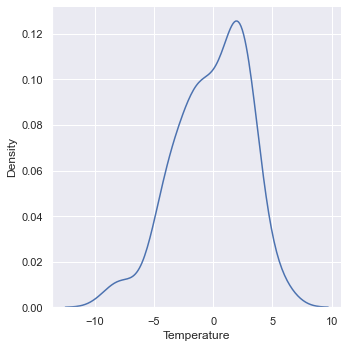

In [236]:
sns.displot(resid_lasso, kind='kde')

In [237]:
## Performance Metrics

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,lasso_pred))
print(mean_absolute_error(y_test,lasso_pred))
print(np.sqrt(mean_squared_error(y_test,lasso_pred)))

9.10609532182792
2.4978660766652734
3.0176307464346794


# R square and adjusted R square

In [238]:
# R square

from sklearn.metrics import r2_score
score=r2_score(y_test, lasso_pred)
print(score)

0.39784019626969913


In [239]:
# adjusted R square
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.2810032194265064

i am getting an r2 value with Lasso regression is 0.397 which means 39.7 % accuracy, model is performed some what well and predicting good with lasso algorithem.

since this algorithem is used when there is a outliers, but  in my dataset there was not much outliers

# Elastic net regression

In [240]:
 from sklearn.linear_model import ElasticNet

In [242]:
elastic_regression= ElasticNet()
elastic_regression

ElasticNet()

In [243]:
elastic_regression.fit(X_train,y_train)

ElasticNet()

In [244]:
# prediction for the test data

elstic_predict= elastic_regression.predict(X_test)

In [245]:
# residuals
residuls_elastic= y_test - elstic_predict

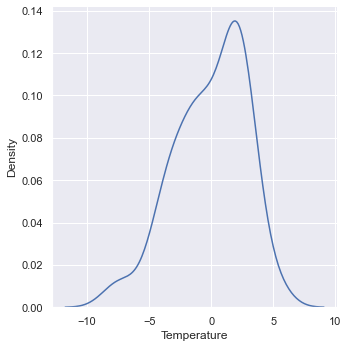

In [246]:
sns.displot(residuls_elastic, kind='kde')

In [247]:
## Performance Metrics

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,elstic_predict))
print(mean_absolute_error(y_test,elstic_predict))
print(np.sqrt(mean_squared_error(y_test,elstic_predict)))

8.305501650077508
2.389956675555907
2.881926725313728


# R square and adjusted R square

In [248]:
from sklearn.metrics import r2_score
score=r2_score(y_test,elstic_predict)
print(score)

0.45078114529461855


In [249]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.34421629288909683

 r2 value i am getting with elastic net regression is 0.45 which means 45% accuracy, 
i can say that model was build is not bad and performing/ predicting some what  well and accuratly.

since elstic net regression used when dataset has both outliers and overfitting, but in my dataset there is less outliers and data is not overfitting

# Thank you